In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
dataset = pd.read_csv("E:\\python\\New folder (3)\\stockmarket\\MSFT.csv")
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
0,41.389999,41.480000,41.020000,41.270000,35.130825,15019200,MICROSOFT
1,41.029999,41.160000,40.860001,41.110001,34.994621,15117700,MICROSOFT
2,40.930000,41.070000,40.770000,40.860001,34.781807,18040000,MICROSOFT
3,40.810001,40.880001,40.290001,40.580002,34.543453,29818900,MICROSOFT
4,41.099998,41.570000,40.860001,41.230000,35.096764,26310000,MICROSOFT


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Adj Close     2518 non-null   float64
 5   Volume        2518 non-null   int64  
 6   company_name  2518 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [4]:
data = dataset[0:2000]
testdata = dataset[2000:2518]
data

,Open,High,Low,Close,Adj Close,Volume,company_name
0,41.389999,41.480000,41.020000,41.270000,35.130825,15019200,MICROSOFT
1,41.029999,41.160000,40.860001,41.110001,34.994621,15117700,MICROSOFT
2,40.930000,41.070000,40.770000,40.860001,34.781807,18040000,MICROSOFT
3,40.810001,40.880001,40.290001,40.580002,34.543453,29818900,MICROSOFT
4,41.099998,41.570000,40.860001,41.230000,35.096764,26310000,MICROSOFT
...,...,...,...,...,...,...,...
1995,271.690002,273.750000,265.070007,269.500000,264.232635,39336400,MICROSOFT
1996,265.679993,271.359985,259.299988,260.549988,255.457596,48975900,MICROSOFT
1997,257.690002,259.880005,250.020004,255.350006,250.359222,51033800,MICROSOFT
1998,257.350006,263.040009,255.350006,261.119995,256.016449,34925100,MICROSOFT


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

C:\Users\aksha\AppData\Local\Temp\ipykernel_12396\668710601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Close"]=pd.to_numeric(data.Close,errors='coerce')


In [6]:
trainData

array([[ 35.13082504],
       [ 34.99462128],
       [ 34.78180695],
       ...,
       [250.35922241],
       [256.01644897],
       [256.38903809]])

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2000, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,len(trainData)): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1940, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
61/61 - 17s - loss: 0.0160 - 17s/epoch - 279ms/step
Epoch 2/20
61/61 - 7s - loss: 0.0019 - 7s/epoch - 107ms/step
Epoch 3/20
61/61 - 7s - loss: 0.0016 - 7s/epoch - 108ms/step
Epoch 4/20
61/61 - 7s - loss: 0.0016 - 7s/epoch - 107ms/step
Epoch 5/20
61/61 - 6s - loss: 0.0015 - 6s/epoch - 103ms/step
Epoch 6/20
61/61 - 6s - loss: 0.0016 - 6s/epoch - 103ms/step
Epoch 7/20
61/61 - 6s - loss: 0.0019 - 6s/epoch - 103ms/step
Epoch 8/20
61/61 - 6s - loss: 0.0015 - 6s/epoch - 105ms/step
Epoch 9/20
61/61 - 6s - loss: 0.0015 - 6s/epoch - 105ms/step
Epoch 10/20
61/61 - 6s - loss: 0.0013 - 6s/epoch - 106ms/step
Epoch 11/20
61/61 - 6s - loss: 0.0010 - 6s/epoch - 106ms/step
Epoch 12/20
61/61 - 6s - loss: 0.0012 - 6s/epoch - 105ms/step
Epoch 13/20
61/61 - 6s - loss: 0.0013 - 6s/epoch - 104ms/step
Epoch 14/20
61/61 - 6s - loss: 0.0011 - 6s/epoch - 104ms/step
Epoch 15/20
61/61 - 6s - loss: 0.0015 - 6s/epoch - 104ms/step
Epoch 16/20
61/61 - 6s - loss: 0.0018 - 6s/epoch - 106ms/step
Epoch 17/20
61/

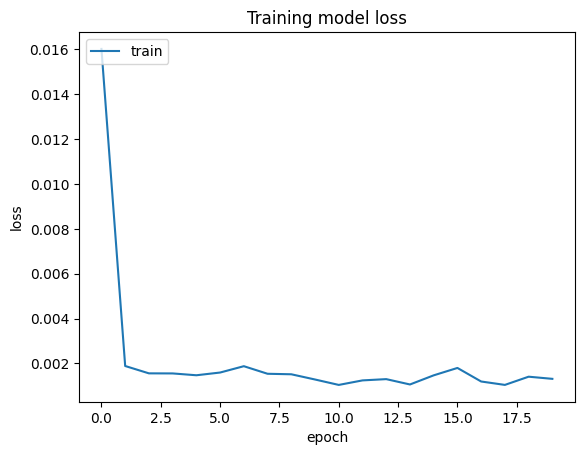

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData=dataset[2000:2518]
testData

,Open,High,Low,Close,Adj Close,Volume,company_name
2000,266.109985,268.329987,262.459991,266.820007,261.605072,28828800,MICROSOFT
2001,263.000000,263.600006,252.770004,254.080002,249.694260,31356000,MICROSOFT
2002,253.899994,257.670013,251.880005,253.139999,248.770462,32692300,MICROSOFT
2003,257.239990,258.540009,246.440002,252.559998,248.200485,39199300,MICROSOFT
2004,255.490005,261.500000,253.429993,260.649994,256.150848,33175400,MICROSOFT
...,...,...,...,...,...,...,...
2513,415.529999,416.429993,408.920013,413.519989,413.519989,17484700,MICROSOFT
2514,412.429993,416.440002,409.679993,416.070007,416.070007,14348900,MICROSOFT
2515,417.809998,424.079987,416.299988,424.010010,424.010010,16988000,MICROSOFT
2516,424.010010,425.309998,420.579987,424.519989,424.519989,14861300,MICROSOFT


In [14]:

testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

C:\Users\aksha\AppData\Local\Temp\ipykernel_12396\3990921063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')


(458, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

15/15 [==============================] - 3s 57ms/step


array([[0.7914856 ],
       [0.7966335 ],
       [0.8017275 ],
       [0.8067633 ],
       [0.81164265],
       [0.8162058 ],
       [0.82018983],
       [0.8231487 ],
       [0.82477874],
       [0.82499945],
       [0.82403594],
       [0.82189035],
       [0.818565  ],
       [0.8141336 ],
       [0.8087617 ],
       [0.80268896],
       [0.7960833 ],
       [0.7890706 ],
       [0.78198147],
       [0.7751714 ],
       [0.769111  ],
       [0.76419896],
       [0.76017255],
       [0.75667423],
       [0.7532144 ],
       [0.74945176],
       [0.74525213],
       [0.7405937 ],
       [0.7354693 ],
       [0.73003376],
       [0.72441167],
       [0.71873826],
       [0.71313107],
       [0.7078565 ],
       [0.7030358 ],
       [0.6985805 ],
       [0.6946344 ],
       [0.6915897 ],
       [0.6897256 ],
       [0.6890383 ],
       [0.6889643 ],
       [0.68878686],
       [0.6878834 ],
       [0.68594736],
       [0.6832251 ],
       [0.67993224],
       [0.6765702 ],
       [0.673

In [16]:
predicted_price = sc.inverse_transform(y_pred)

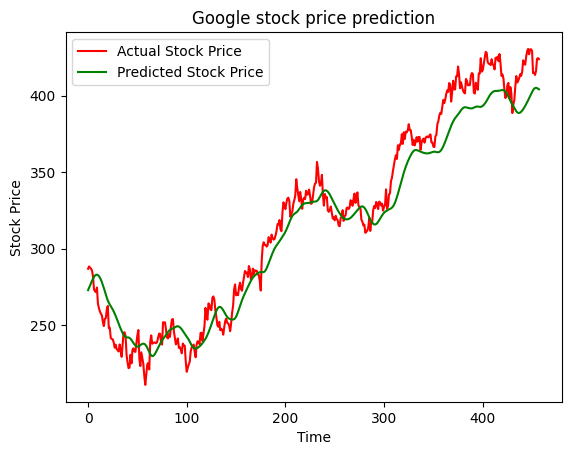

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
model2 = Sequential()

model2.add(LSTM(units=256, return_sequences = True, input_shape =(X_train.shape[1],1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units=128, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=64, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=32, return_sequences = False))
model2.add(Dropout(0.2))

model2.add(Dense(units =1))
model2.compile(optimizer='adam',loss="mean_squared_error")

In [19]:
hist2 = model2.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose=2)

Epoch 1/30
61/61 - 20s - loss: 0.0122 - 20s/epoch - 328ms/step
Epoch 2/30
61/61 - 11s - loss: 0.0028 - 11s/epoch - 184ms/step
Epoch 3/30
61/61 - 11s - loss: 0.0028 - 11s/epoch - 180ms/step
Epoch 4/30
61/61 - 11s - loss: 0.0027 - 11s/epoch - 180ms/step
Epoch 5/30
61/61 - 11s - loss: 0.0026 - 11s/epoch - 181ms/step
Epoch 6/30
61/61 - 11s - loss: 0.0027 - 11s/epoch - 182ms/step
Epoch 7/30
61/61 - 11s - loss: 0.0028 - 11s/epoch - 183ms/step
Epoch 8/30
61/61 - 11s - loss: 0.0028 - 11s/epoch - 185ms/step
Epoch 9/30
61/61 - 11s - loss: 0.0022 - 11s/epoch - 185ms/step
Epoch 10/30
61/61 - 11s - loss: 0.0021 - 11s/epoch - 184ms/step
Epoch 11/30
61/61 - 11s - loss: 0.0021 - 11s/epoch - 188ms/step
Epoch 12/30
61/61 - 11s - loss: 0.0015 - 11s/epoch - 186ms/step
Epoch 13/30
61/61 - 11s - loss: 0.0018 - 11s/epoch - 185ms/step
Epoch 14/30
61/61 - 12s - loss: 0.0022 - 12s/epoch - 189ms/step
Epoch 15/30
61/61 - 12s - loss: 0.0017 - 12s/epoch - 189ms/step
Epoch 16/30
61/61 - 11s - loss: 0.0019 - 11s/epoc

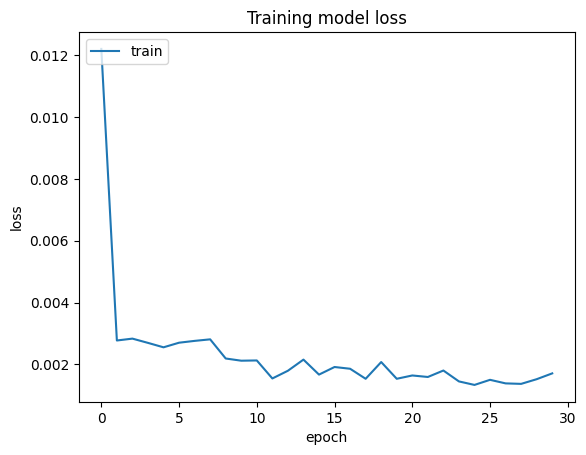

In [20]:
plt.plot(hist2.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
y_pred2 = model2.predict(X_test)
y_pred2

15/15 [==============================] - 3s 82ms/step


array([[0.7482694 ],
       [0.7512092 ],
       [0.75453204],
       [0.75832254],
       [0.7623485 ],
       [0.76618344],
       [0.769213  ],
       [0.77055687],
       [0.7696849 ],
       [0.76663685],
       [0.76213914],
       [0.75657725],
       [0.7501978 ],
       [0.7432379 ],
       [0.7359974 ],
       [0.7288323 ],
       [0.7219059 ],
       [0.7152299 ],
       [0.70914197],
       [0.70405066],
       [0.7005597 ],
       [0.69912124],
       [0.69892895],
       [0.6988959 ],
       [0.6978139 ],
       [0.6949683 ],
       [0.6903084 ],
       [0.6842133 ],
       [0.67717046],
       [0.66989654],
       [0.66293925],
       [0.65667546],
       [0.6512779 ],
       [0.64705056],
       [0.64397997],
       [0.64161396],
       [0.639898  ],
       [0.6393287 ],
       [0.6402973 ],
       [0.6426679 ],
       [0.64523846],
       [0.646508  ],
       [0.64531696],
       [0.64136106],
       [0.6355962 ],
       [0.62908757],
       [0.6232801 ],
       [0.619

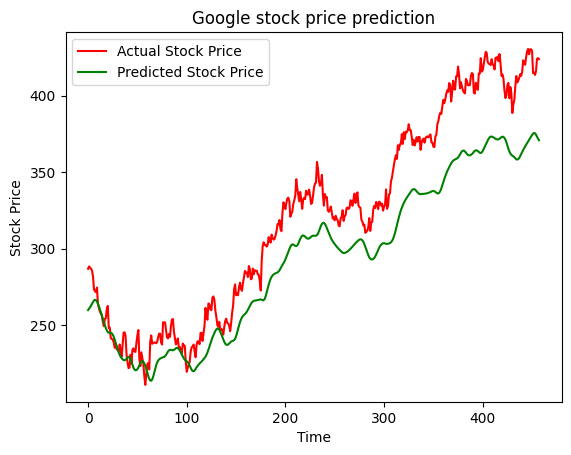

In [22]:
predicted_price2 = sc.inverse_transform(y_pred2)
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price2, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()